In [1]:
from itertools import combinations, product, islice
import textwrap
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import drawsvg as dw

In [2]:
def extract_same_line_codes(station_codes, line_codes):
    if type(line_codes) is not list:
        line_codes = [line_codes]
    return [sub_code for code in station_codes for sub_code in code.split('/') if sub_code[:2] in line_codes]


In [3]:
hours = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0]
day_types = ['WEEKDAY', 'WEEKENDS/HOLIDAY']

all_lines = {
    'NSL': {
        'station_codes': ["EW24/NS1", "NS2", "NS3", "NS4/BP1", "NS5", "NS7", "NS8", "NS9/TE2", "NS10", "NS11", "NS12", "NS13", "NS14", "NS15", "NS16", "NS17/CC15", "NS18", "NS19", "NS20", "NS21/DT11", "TE14/NS22", "NS23", "NS24/NE6/CC1", "NS25/EW13", "EW14/NS26", "NS27/CE2/TE20", "NS28"],
        'travel_times': [3, 2, 5, 2, 5, 3, 2, 3, 4, 2, 3, 3, 5, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2],
        'line_prefixes': ['NS'],
        'line_color': (209, 60, 50),
        'train_capacity': 1920,
        'seat_capacity': 264
    },
    'EWL': {
        'station_codes': ['EW1', 'EW2/DT32', 'EW3', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8/CC9', 'EW9', 'EW10', 'EW11', 'EW12/DT14', 'NS25/EW13', 'EW14/NS26', 'EW15', 'EW16/NE3/TE17', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21/CC22', 'EW22', 'EW23', 'EW24/NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33'],
        'travel_times': [3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 2],
        'line_prefixes': ['EW'],
        'line_color': (66, 148, 84),
        'train_capacity': 1920,
        'seat_capacity': 264
    },
    'EWL-CGL': {
        'station_codes': ['CG2', 'CG1/DT35', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8/CC9', 'EW9', 'EW10', 'EW11', 'EW12/DT14', 'NS25/EW13', 'EW14/NS26', 'EW15', 'EW16/NE3/TE17', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21/CC22', 'EW22', 'EW23', 'EW24/NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33'],
        'travel_times': [4, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 2],
        'line_prefixes': ['EW', 'CG'],
        'line_color': (66, 148, 84),
        'train_capacity': 1920,
        'seat_capacity': 264
    },
    'NEL': {
        'station_codes': ['NE1/CC29', 'EW16/NE3/TE17', 'NE4/DT19', 'NE5', 'NS24/NE6/CC1', 'NE7/DT12', 'NE8', 'NE9', 'NE10', 'NE11', 'NE12/CC13', 'NE13', 'NE14', 'NE15', 'NE16/STC', 'NE17/PTC'],
        'travel_times': [3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 2, 2, 3],
        'line_prefixes': ['NE'],
        'line_color': (133, 69, 149),
        'train_capacity': 1920,
        'seat_capacity': 268
    },
    'CCL': {
        'station_codes': ['NS24/NE6/CC1', 'CC2', 'CC3', 'CC4/DT15', 'CC5', 'CC6', 'CC7', 'CC8', 'EW8/CC9', 'CC10/DT26', 'CC11', 'CC12', 'NE12/CC13', 'CC14', 'NS17/CC15', 'CC16', 'CC17/TE9', 'CC19/DT9', 'CC20', 'CC21', 'EW21/CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'NE1/CC29'],
        'travel_times': [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        'line_prefixes': ['CC'],
        'line_color': (236, 161, 68),
        'train_capacity': 931,
        'seat_capacity': 146
    },
    'CCL-CEL': {
        'station_codes': ['CE1/DT16', 'NS27/CE2/TE20', 'CC4/DT15', 'CC5', 'CC6', 'CC7', 'CC8', 'EW8/CC9', 'CC10/DT26', 'CC11', 'CC12', 'NE12/CC13', 'CC14', 'NS17/CC15', 'CC16', 'CC17/TE9', 'CC19/DT9', 'CC20', 'CC21', 'EW21/CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'NE1/CC29'],
        'travel_times': [2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        'line_prefixes': ['CE', 'CC'],
        'line_color': (236, 161, 68),
        'train_capacity': 931,
        'seat_capacity': 146
    },
    'TEL': {
        'station_codes': ['TE1', 'NS9/TE2', 'TE3', 'TE4', 'TE5', 'TE6', 'TE7', 'TE8', 'CC17/TE9', 'DT10/TE11', 'TE12', 'TE13', 'TE14/NS22', 'TE15', 'TE16', 'EW16/NE3/TE17', 'TE18', 'TE19', 'NS27/CE2/TE20', 'TE22'],
        'travel_times': [3, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 2, 3, 1, 3, 1, 2, 2, 3],
        'line_prefixes': ['TE'],
        'line_color': (148, 94, 49),
        'train_capacity': 1280,
        'seat_capacity': 156
    },
    'DTL': {
        'station_codes': ['BP6/DT1', 'DT2', 'DT3', 'DT5', 'DT6', 'DT7', 'DT8', 'CC19/DT9', 'DT10/TE11', 'NS21/DT11', 'NE7/DT12', 'DT13', 'EW12/DT14', 'CC4/DT15', 'CE1/DT16', 'DT17', 'DT18', 'NE4/DT19', 'DT20', 'DT21', 'DT22', 'DT23', 'DT24', 'DT25', 'CC10/DT26', 'DT27', 'DT28', 'DT29', 'DT30', 'DT31', 'EW2/DT32', 'DT33', 'DT34', 'CG1/DT35'],
        'travel_times': [2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2],
        'line_prefixes': ['DT'],
        'line_color': (38, 91, 163),
        'train_capacity': 931,
        'seat_capacity': 130
    },
    'SELRT': {
        'station_codes': ['NE16/STC', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'NE16/STC'],
        'travel_times': [1, 1, 1, 1, 1, 1],
        'line_prefixes': ['ST', 'SE'],
        'line_color': (117, 132, 116),
        'train_capacity': 105,
        'seat_capacity': 14
    },
    'SWLRT': {
        'station_codes': ['NE16/STC', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7', 'SW8', 'NE16/STC'],
        'travel_times': [1, 1, 1, 1, 1, 1, 1, 1, 1],
        'line_prefixes': ['ST', 'SW'],
        'line_color': (117, 132, 116),
        'train_capacity': 105,
        'seat_capacity': 14
    },
    'PELRT': {
        'station_codes': ['NE17/PTC', 'PE1', 'PE2', 'PE3', 'PE4', 'PE5', 'PE6', 'PE7', 'NE17/PTC'],
        'travel_times': [1, 1, 1, 1, 1, 1, 1, 1],
        'line_prefixes': ['PT', 'PE'],
        'line_color': (117, 132, 116),
        'train_capacity': 105,
        'seat_capacity': 14
    },
    'PWLRT': {
        'station_codes': ['NE17/PTC', 'PW1', 'PW3', 'PW4', 'PW5', 'PW6', 'PW7', 'NE17/PTC'],
        'travel_times': [1, 1, 1, 1, 1, 1, 1],
        'line_prefixes': ['PT', 'PW'],
        'line_color': (117, 132, 116),
        'train_capacity': 105,
        'seat_capacity': 14
    },
    'BPLRT': {
        'station_codes': ['NS4/BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6/DT1', 'BP7', 'BP8', 'BP9', 'BP10', 'BP11', 'BP12', 'BP13', 'BP6/DT1', 'BP5', 'BP4', 'BP3', 'BP2', 'NS4/BP1'],
        'travel_times': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'line_prefixes': ['BP'],
        'line_color': (117, 132, 116),
        'train_capacity': 105,
        'seat_capacity': 16
    }
}

prefix_colors = {
    prefix: data['line_color']
    for line_code, data in all_lines.items()
    for prefix in data['line_prefixes']
}

station_set = set(sum([data['station_codes'] for data in all_lines.values()], []))

station_set

{'BP10',
 'BP11',
 'BP12',
 'BP13',
 'BP2',
 'BP3',
 'BP4',
 'BP5',
 'BP6/DT1',
 'BP7',
 'BP8',
 'BP9',
 'CC10/DT26',
 'CC11',
 'CC12',
 'CC14',
 'CC16',
 'CC17/TE9',
 'CC19/DT9',
 'CC2',
 'CC20',
 'CC21',
 'CC23',
 'CC24',
 'CC25',
 'CC26',
 'CC27',
 'CC28',
 'CC3',
 'CC4/DT15',
 'CC5',
 'CC6',
 'CC7',
 'CC8',
 'CE1/DT16',
 'CG1/DT35',
 'CG2',
 'DT10/TE11',
 'DT13',
 'DT17',
 'DT18',
 'DT2',
 'DT20',
 'DT21',
 'DT22',
 'DT23',
 'DT24',
 'DT25',
 'DT27',
 'DT28',
 'DT29',
 'DT3',
 'DT30',
 'DT31',
 'DT33',
 'DT34',
 'DT5',
 'DT6',
 'DT7',
 'DT8',
 'EW1',
 'EW10',
 'EW11',
 'EW12/DT14',
 'EW14/NS26',
 'EW15',
 'EW16/NE3/TE17',
 'EW17',
 'EW18',
 'EW19',
 'EW2/DT32',
 'EW20',
 'EW21/CC22',
 'EW22',
 'EW23',
 'EW24/NS1',
 'EW25',
 'EW26',
 'EW27',
 'EW28',
 'EW29',
 'EW3',
 'EW30',
 'EW31',
 'EW32',
 'EW33',
 'EW4',
 'EW5',
 'EW6',
 'EW7',
 'EW8/CC9',
 'EW9',
 'NE1/CC29',
 'NE10',
 'NE11',
 'NE12/CC13',
 'NE13',
 'NE14',
 'NE15',
 'NE16/STC',
 'NE17/PTC',
 'NE4/DT19',
 'NE5',
 'NE7/DT12',

In [4]:
interchange_transfer_time = 8
network_graph = nx.Graph()
for line_code, station_data in all_lines.items():
    station_codes = extract_same_line_codes(station_data['station_codes'], station_data['line_prefixes'])
    travel_times = station_data['travel_times']

    for i in range(len(station_codes)-1):
        network_graph.add_edge(station_codes[i], station_codes[i+1], time=travel_times[i], train_capacity=station_data['train_capacity'])

        if '/' in station_data['station_codes'][i]:
            sub_codes = station_data['station_codes'][i].split('/')
            for u, v in combinations(sub_codes, 2):
                network_graph.add_edge(u, v, time=interchange_transfer_time, train_capacity=station_data['train_capacity'])

# Add reverse edges
for u, v in network_graph.edges:
    network_graph.add_edge(v, u, **network_graph.edges[(u, v)])
    
len(network_graph.nodes)

sections = set()
for start, end in set(network_graph.edges):
    sections.add((start, end))
    sections.add((end, start))

network_graph['EW1']

AtlasView({'EW2': {'time': 3, 'train_capacity': 1920}})

In [5]:
path_demand_factors = {s1: {s2: None for s2 in station_set if s1 != s2} for s1 in station_set}
weight_func = lambda path: nx.path_weight(network_graph, path, 'time')

for station1, station2 in combinations(station_set, 2):
    origin_codes = station1.split('/')
    destination_codes = station2.split('/')

    candidate_paths = set()
    for origin, destination in product(origin_codes, destination_codes):
        k_shortest_paths = set([tuple(l) for l in islice(nx.shortest_simple_paths(network_graph, origin, destination, 'time'), 5)])
        candidate_paths = candidate_paths.union(k_shortest_paths)

    candidate_paths = sorted(candidate_paths, key=weight_func)
    final_paths = [candidate_paths[0]]
    for i in range(1, len(candidate_paths)):
        if any([set(l).issubset(set(candidate_paths[i])) for l in final_paths]):
            continue
        else:
            final_paths.append(candidate_paths[i])

    final_paths = [x for x in final_paths if weight_func(x) <= weight_func(final_paths[0]) + 15][:3]

    total_demand = [weight_func(final_paths[-1]) - weight_func(x) + 1 for x in final_paths]
    path_demand_factors[station1][station2] = [(x, total_demand[i] / sum(total_demand)) for i, x in enumerate(final_paths)]
    path_demand_factors[station2][station1] = [(x[::-1], total_demand[i] / sum(total_demand)) for i, x in enumerate(final_paths)]

In [6]:
for x, factor in path_demand_factors["EW24/NS1"]["NS16"]:
    print(len(x), weight_func(x), x, factor)

13 44 ('EW24', 'EW23', 'EW22', 'EW21', 'CC22', 'CC21', 'CC20', 'CC19', 'CC17', 'CC16', 'CC15', 'NS17', 'NS16') 0.5
15 45 ('NS1', 'NS2', 'NS3', 'NS4', 'NS5', 'NS7', 'NS8', 'NS9', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16') 0.4642857142857143
17 57 ('EW24', 'EW23', 'EW22', 'EW21', 'CC22', 'CC21', 'CC20', 'CC19', 'DT9', 'DT10', 'DT11', 'NS21', 'NS20', 'NS19', 'NS18', 'NS17', 'NS16') 0.03571428571428571


In [8]:
raw_df = pd.read_csv("origin_destination_train_202305.csv")
raw_df

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2023-05,WEEKDAY,9,TRAIN,DT24,EW32,2
1,2023-05,WEEKDAY,9,TRAIN,EW32,DT24,1
2,2023-05,WEEKDAY,6,TRAIN,BP4,EW31,23
3,2023-05,WEEKDAY,12,TRAIN,SW5,NE15,69
4,2023-05,WEEKENDS/HOLIDAY,12,TRAIN,SW5,NE15,38
...,...,...,...,...,...,...,...
731651,2023-05,WEEKDAY,23,TRAIN,NE14,EW24/NS1,1
731652,2023-05,WEEKENDS/HOLIDAY,15,TRAIN,BP2,BP3,9
731653,2023-05,WEEKDAY,15,TRAIN,BP3,BP2,37
731654,2023-05,WEEKENDS/HOLIDAY,15,TRAIN,BP3,BP2,15


In [9]:
station_name_df = pd.read_csv("Train Station Codes and Chinese Names.csv", index_col='stn_code')
station_name_df

,mrt_station_english,mrt_station_chinese,mrt_line_english,mrt_line_chinese,Unnamed: 5
stn_code,,,,,
NS1,Jurong East,裕廊东,North-South Line,南北线,NaN
NS2,Bukit Batok,武吉巴督,North-South Line,南北线,NaN
NS3,Bukit Gombak,武吉甘柏,North-South Line,南北线,NaN
NS4,Choa Chu Kang,蔡厝港,North-South Line,南北线,NaN
NS5,Yew Tee,油池,North-South Line,南北线,NaN
...,...,...,...,...,...
TE17,Outram Park,欧南园,Thomson-East Coast Line,汤申-东海岸线,NaN
TE18,Maxwell,麦士威,Thomson-East Coast Line,汤申-东海岸线,NaN
TE19,Shenton Way,珊顿道,Thomson-East Coast Line,汤申-东海岸线,NaN


In [10]:
station_name_codes = set()
for station_code in station_set:
    for sub_code in station_code.split("/"):
        station_name_codes.add(station_name_df["mrt_station_english"].loc[sub_code] + " (" + station_code + ")")
print(sorted(list(station_name_codes), key=lambda x: x.lower()))

['Admiralty (NS10)', 'Aljunied (EW9)', 'Ang Mo Kio (NS16)', 'Bakau (SE3)', 'Bangkit (BP9)', 'Bartley (CC12)', 'Bayfront (CE1/DT16)', 'Beauty World (DT5)', 'Bedok (EW5)', 'Bedok North (DT29)', 'Bedok Reservoir (DT30)', 'Bencoolen (DT21)', 'Bendemeer (DT23)', 'Bishan (NS17/CC15)', 'Boon Keng (NE9)', 'Boon Lay (EW27)', 'Botanic Gardens (CC19/DT9)', 'Braddell (NS18)', 'Bras Basah (CC2)', 'Bright Hill (TE7)', 'Buangkok (NE15)', 'Bugis (EW12/DT14)', 'Bukit Batok (NS2)', 'Bukit Gombak (NS3)', 'Bukit Panjang (BP6/DT1)', 'Buona Vista (EW21/CC22)', 'Caldecott (CC17/TE9)', 'Canberra (NS12)', 'Cashew (DT2)', 'Changi Airport (CG2)', 'Cheng Lim (SW1)', 'Chinatown (NE4/DT19)', 'Chinese Garden (EW25)', 'Choa Chu Kang (NS4/BP1)', 'City Hall (NS25/EW13)', 'Clarke Quay (NE5)', 'Clementi (EW23)', 'Commonwealth (EW20)', 'Compassvale (SE1)', 'Coral Edge (PE3)', 'Cove (PE1)', 'Dakota (CC8)', 'Damai (PE7)', 'Dhoby Ghaut (NS24/NE6/CC1)', 'Dover (EW22)', 'Downtown (DT17)', 'Esplanade (CC3)', 'Eunos (EW7)', 'Exp

In [11]:
num_weekdays = 18
num_weekends_holidays = 12

weekday_peak_freq = 3
weekday_nonpeak_freq = 7
weekend_peak_freq = 5
weekend_nonpeak_freq = 7

weekday_peak_hours = [7, 8, 9, 17, 18, 19]
weekend_peak_hours = [12, 13, 14, 18, 19, 20, 21, 22, 23]

# capacity_df = nx.to_pandas_edgelist(network_graph, 'START', 'END').rename({'train_capacity': 'TRAIN_CAPACITY'}, axis=1).drop(columns=['time'])
capacity_df = pd.DataFrame.from_records([(start, end, network_graph[start][end]['train_capacity']) for start, end in sections], columns=['START', 'END', 'TRAIN_CAPACITY'])
path_df = pd.DataFrame.from_records([(start, end, path[i], path[i+1], demand_factor) for start in path_demand_factors for end in path_demand_factors[start] for path, demand_factor in path_demand_factors[start][end] for i in range(len(path)-1)], columns=['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE', 'START', 'END', "DEMAND_FACTOR"])

counts_df = pd.merge(path_df, raw_df, on=['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'], how='left')
counts_df['COUNT'] = counts_df['DEMAND_FACTOR'] * counts_df['TOTAL_TRIPS']
counts_df = counts_df.drop(columns=['DEMAND_FACTOR'])

counts_df = counts_df.groupby(['DAY_TYPE', 'TIME_PER_HOUR', 'START', 'END']).sum().reset_index()

counts_df = counts_df.merge(capacity_df[['START', 'END', 'TRAIN_CAPACITY']], on=['START', 'END'], how='left')
counts_df['TOTAL_CAPACITY'] = counts_df['TRAIN_CAPACITY'] * np.where(counts_df['DAY_TYPE'] == 'WEEKDAY', num_weekdays * 60 / np.where(counts_df['TIME_PER_HOUR'].isin(weekday_peak_hours), weekday_peak_freq, weekday_nonpeak_freq), num_weekends_holidays * 60 / np.where(counts_df['TIME_PER_HOUR'].isin(weekend_peak_hours), weekend_peak_freq, weekend_nonpeak_freq))

counts_df['CROWDEDNESS'] = np.round((counts_df['COUNT'] / counts_df['TOTAL_CAPACITY']) * 100)

counts_df = counts_df.drop(['TOTAL_CAPACITY', 'TRAIN_CAPACITY'], axis='columns')

counts_df.to_csv("counts_df.csv")

counts_df


/var/folders/vb/c7xgz3hj50jdtms08nbxf0jc0000gn/T/ipykernel_1527/2958507185.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  counts_df = counts_df.groupby(['DAY_TYPE', 'TIME_PER_HOUR', 'START', 'END']).sum().reset_index()


,DAY_TYPE,TIME_PER_HOUR,START,END,TOTAL_TRIPS,COUNT,CROWDEDNESS
0,WEEKDAY,0.0,BP1,BP2,22.0,4.107143,0.0
1,WEEKDAY,0.0,BP1,NS4,40.0,4.094661,0.0
2,WEEKDAY,0.0,BP2,BP1,63.0,8.819273,0.0
3,WEEKDAY,0.0,BP2,BP3,21.0,3.107143,0.0
4,WEEKDAY,0.0,BP3,BP2,63.0,8.819273,0.0
...,...,...,...,...,...,...,...
18646,WEEKENDS/HOLIDAY,23.0,TE8,TE7,11028.0,3903.802980,2.0
18647,WEEKENDS/HOLIDAY,23.0,TE8,TE9,1743.0,685.649180,0.0
18648,WEEKENDS/HOLIDAY,23.0,TE9,CC17,1981.0,519.031242,0.0
18649,WEEKENDS/HOLIDAY,23.0,TE9,TE11,1155.0,355.966184,0.0


Text(0.5, 1.0, 'NSL WEEKENDS/HOLIDAY')

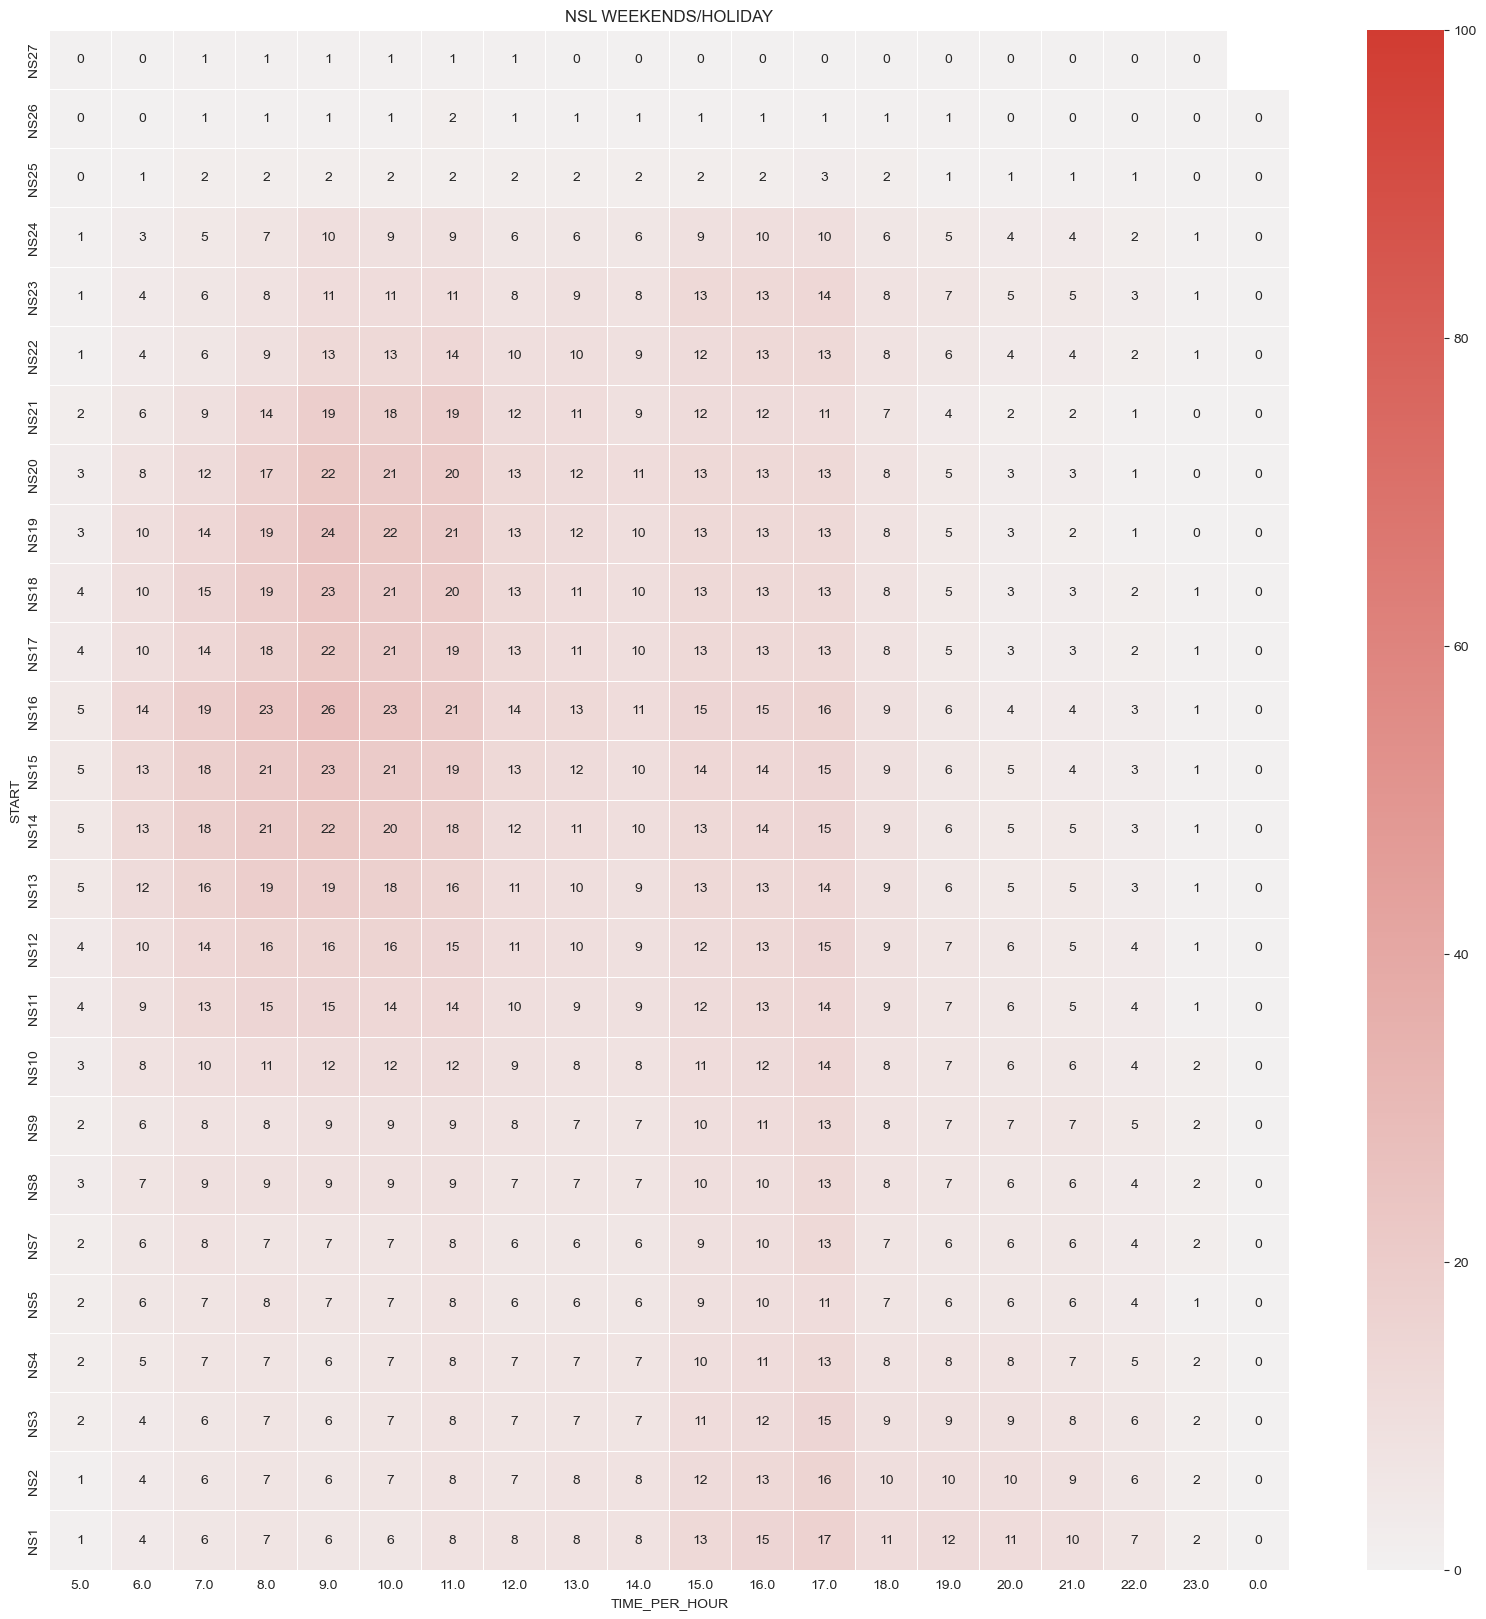

In [12]:
line_code = 'NSL'
day_type = 'WEEKENDS/HOLIDAY'

station_codes = extract_same_line_codes(all_lines[line_code]['station_codes'], all_lines[line_code]['line_prefixes'])

data_df = counts_df[counts_df['DAY_TYPE'].str.contains(day_type)]
section_index = pd.MultiIndex.from_frame(data_df[['START', 'END']])

forward_sections = [(station_codes[i], station_codes[i+1]) for i in range(len(station_codes) - 1)]
forward_df = data_df[section_index.isin(forward_sections)]
forward_df = forward_df.set_index(['TIME_PER_HOUR', 'START'])['CROWDEDNESS']
forward_df = forward_df.unstack('TIME_PER_HOUR')[hours]
forward_df = forward_df.reindex(reversed(station_codes[:-1]))

plt.figure(figsize = (20,20))
sns.set_style('white')
cmap = sns.light_palette('#{:02x}{:02x}{:02x}'.format(*all_lines[line_code]['line_color']), as_cmap=True)
sns.heatmap(forward_df, cmap=cmap, linewidths=0.5, annot=True, fmt='g', vmin=0, vmax=100)
# pos, text = plt.yticks()
# _, _ = plt.yticks(pos - 0.5, all_lines[line_code])
plt.title(line_code + " " + day_type)


In [13]:
def create_train(cx, cy, color, value, min, max, direction):
    # Creates a train graphic centered at (cx, cy), with a fill amount relative to value, min and max, facing in the specified direction
    train_width = 15
    train_length = train_width * (1 + 5 ** 0.5)
    corner_rounding = 4
    stroke_width = 1.5
    direction_offset = 10

    x_size = train_length if (direction == 'left' or direction == 'right') else train_width
    y_size = train_width if (direction == 'left' or direction == 'right') else train_length

    x = cx - x_size/2
    y = cy - y_size/2

    fill_amount = np.tanh(3 * ((value - min) / (max - min)))

    clip_x = x - direction_offset if direction == 'left' else x + direction_offset if direction == 'right' else x - stroke_width
    clip_y = y - direction_offset if direction == 'up' else y + direction_offset if direction == 'down' else y - stroke_width

    clip = dw.ClipPath([dw.Rectangle(clip_x, clip_y, x_size + 2 * stroke_width, y_size + 2 * stroke_width, stroke_width=stroke_width, fill=color, fill_opacity=0.3)])

    grad_sx = 1 if direction == 'left' else 0
    grad_sy = 1 if direction == 'up' else 0
    grad_ex = 1 if direction == 'right' else 0
    grad_ey = 1 if direction == 'down' else 0

    grad = dw.LinearGradient(grad_sx, grad_sy, grad_ex, grad_ey, 'objectBoundingBox')
    grad.add_stop(0, color, opacity=0)
    grad.add_stop(0.4, color, opacity=1)
    grad.add_stop(1, color, opacity=1)

    outer = dw.Rectangle(x, y, x_size, y_size, ry=corner_rounding, stroke=grad, stroke_width=stroke_width, fill='none', clip_path=clip)

    inner_x = x + direction_offset - corner_rounding + (1-fill_amount) * (x_size - direction_offset) if direction == 'right' else x
    inner_y = y + direction_offset - corner_rounding + (1-fill_amount) * (y_size - direction_offset) if direction == 'down' else y
    inner_x_size = x_size if (direction == 'up' or direction == 'down') else fill_amount * (x_size - direction_offset) + corner_rounding
    inner_y_size = y_size if (direction == 'left' or direction == 'right') else fill_amount * (y_size - direction_offset) + corner_rounding

    inner = dw.Rectangle(inner_x, inner_y, inner_x_size, inner_y_size, ry=corner_rounding, stroke='none', fill=color, fill_opacity=fill_amount)

    return dw.Group([clip, inner, outer])

In [14]:
def create_line(sx, sy, spacing, line_colors, text_colors, marker_colors, names, direction):
    line_colors = [line_colors] * len(names) if type(line_colors) is str else line_colors
    marker_colors = [marker_colors] * len(names) if type(marker_colors) is str else marker_colors
    text_colors = [text_colors] * len(names) if type(text_colors) is str else text_colors

    width = 40
    height = 26
    corner_rounding_x = 7.5
    corner_rounding_y = 15
    stroke_width = 5
    font_size = 9

    n = len(names)

    lsx = sx
    lsy = sy
    lines = []
    for i in range(n-1):
        lex = lsx + (1 if direction == 'right' else -1 if direction == 'left' else 0) * spacing
        ley = lsy + (1 if direction == 'down' else -1 if direction == 'up' else 0) * spacing

        lines.append(dw.Line(lsx, lsy, lex, ley, stroke=line_colors[i], stroke_width=stroke_width))

        lsx = lex
        lsy = ley

    stations = []
    for i, name in enumerate(names):
        x = sx - width / 2 + (i if direction == 'right' else -i if direction == 'left' else 0) * spacing
        y = sy - height / 2 + (i if direction == 'down' else -i if direction == 'up' else 0) * spacing
        station = dw.Rectangle(x, y, width, height, rx=corner_rounding_x, ry=corner_rounding_y, stroke='white', stroke_width=2, fill=marker_colors[i])

        tx = sx + (i if direction == 'right' else -i if direction == 'left' else 0) * spacing
        ty = sy + (i if direction == 'down' else -i if direction == 'up' else 0) * spacing
        name = dw.Text(text=name, x=tx, y=ty, font_size=font_size, font_weight='bold', fill=text_colors[i], text_anchor='middle', dominant_baseline='middle')

        stations.append(dw.Group([station, name]))
    
    return dw.Group(lines + stations)

In [15]:
def draw_heatmap(forward_df, backward_df, station_codes, station_names, hours, data_min=None, data_max=None, col='CROWDEDNESS'):
    print("Drawing heatmap for line: ", station_codes)
    station_spacing = 55
    time_spacing = 55

    left_margin = 130
    top_margin = 50

    data_max = np.max(np.max(forward_df), np.max(backward_df)) if data_max is None else data_max
    data_min = np.min(np.max(forward_df), np.max(backward_df)) if data_min is None else data_min

    canvas_width = 1430
    canvas_height = len(station_codes) * station_spacing + top_margin

    d = dw.Drawing(canvas_width, canvas_height, font_family='Verdana')

    # Draw Background
    bg = dw.Rectangle(0, 0, canvas_width, canvas_height, fill='white')
    d.append(bg)

    # Draw Station Axis
    station_line_height = 500
    station_sx = left_margin
    station_sy = top_margin + station_spacing / 2
    station_colors = ['rgb' + str(prefix_colors[station_code[:2]]) for station_code in station_codes]
    forward_line = create_line(station_sx, station_sy, station_spacing, station_colors, 'white', station_colors, station_codes, 'down')
    d.append(forward_line)

    # Name Column
    for i, station_name in enumerate(station_names):
        t = dw.Text(textwrap.wrap(station_name, width=10), 11, station_sx - 65, station_sy + i * station_spacing, fill='rgb(43, 41, 37)', font_weight='bold', text_anchor='middle', dominant_baseline='middle')
        d.append(t)

    # Draw Time Axis
    time_names = ['{:02d}:00'.format(i) for i in list(range(5, 24)) + [0, 1]]
    time_sx = left_margin + time_spacing / 2
    time_sy = top_margin
    time_line = create_line(time_sx, time_sy, time_spacing, station_colors[0], 'white', station_colors[0], time_names, 'right')
    d.append(time_line)

    forward_backward_gap = 20

    # Draw Forward Data
    forward_grid_origin_x = time_sx + time_spacing / 2 - forward_backward_gap / 2
    forward_grid_origin_y = station_sy + (station_spacing / 2)
    for y, station_code in enumerate(station_codes[:-1]):
        for x, hour in enumerate(hours):
            d.append(create_train(
                forward_grid_origin_x + x * time_spacing, 
                forward_grid_origin_y + y * station_spacing, 
                'rgb'+ str(prefix_colors[station_code[:2]]), 
                forward_df[hour].get(station_code, 0).squeeze(), data_min, data_max,
                'down'
            ))

    # Draw Backward Data
    backward_grid_origin_x = forward_grid_origin_x + forward_backward_gap
    backward_grid_origin_y = forward_grid_origin_y
    for y, station_code in enumerate(station_codes[1:]):
        for x, hour in enumerate(hours):
            d.append(create_train(
                backward_grid_origin_x + x * time_spacing, 
                backward_grid_origin_y + y * station_spacing, 
                'rgb'+ str(prefix_colors[station_code[:2]]), 
                backward_df[hour].get(station_code, 0).squeeze(), data_min, data_max,
                'up'
            ))

    # Draw Color Bar
    color_bar_width = 50
    color_bar_x = left_margin + time_spacing / 2 + len(hours) * time_spacing + time_spacing / 2
    color_bar_y = station_sy
    color_bar_height = (len(station_codes)-1) * station_spacing

    color_bar_grad = dw.LinearGradient(0, 0, 0, color_bar_height)
    color_bar_grad.add_stop(0, 'white')
    color_bar_grad.add_stop(1, station_colors[0])

    color_bar = dw.Rectangle(color_bar_x, color_bar_y, color_bar_width, color_bar_height, fill=color_bar_grad, rx=5, stroke=station_colors[0], stroke_width=1.5)

    tick_color = 'rgb(43, 41, 37)'
    tick_font_size = 9
    num_ticks = 5
    tick_values = np.linspace(data_min, data_max, num_ticks)
    ticks = [
        dw.Text(
            f"{value:.0f}", 
            tick_font_size, 
            color_bar_x + color_bar_width + 5, 
            color_bar_y + i * (color_bar_height / (num_ticks-1)), 
            font_weight='bold', 
            fill=tick_color, 
            text_anchor='left', 
            dominant_baseline='middle'
        )
        for i, value in enumerate(tick_values)
    ]
    d.append(dw.Group([color_bar] + ticks))

    return d

In [16]:
def get_data(counts_df_filename, station_codes, day_type, col='CROWDEDNESS'):
    counts_df = pd.read_csv(counts_df_filename)

    data_df = counts_df[
        counts_df['START'].isin(station_codes) &
        counts_df['END'].isin(station_codes) &
        counts_df['DAY_TYPE'].str.contains(day_type)
    ]

    forward_sections = [(station_codes[i], station_codes[i+1]) for i in range(len(station_codes) - 1)]
    forward_df = data_df.set_index(['TIME_PER_HOUR', 'START', 'END'])[col]
    forward_df = forward_df.unstack('TIME_PER_HOUR')[hours]
    forward_df = forward_df.join(pd.DataFrame(index=pd.MultiIndex.from_tuples(forward_sections, names=['START', 'END'])), how='right')

    backward_sections = [(station_codes[::-1][i], station_codes[::-1][i+1]) for i in range(len(station_codes) - 1)]
    backward_df = data_df.set_index(['TIME_PER_HOUR', 'START', 'END'])[col]
    backward_df = backward_df.unstack('TIME_PER_HOUR')[hours]
    backward_df = backward_df.join(pd.DataFrame(index=pd.MultiIndex.from_tuples(backward_sections, names=['START', 'END'])), how='right')

    return forward_df, backward_df

Drawing heatmap for line:  ['NS16', 'NS17', 'CC15', 'CC16', 'CC17', 'CC19', 'CC20', 'CC21', 'CC22', 'EW21', 'EW20']


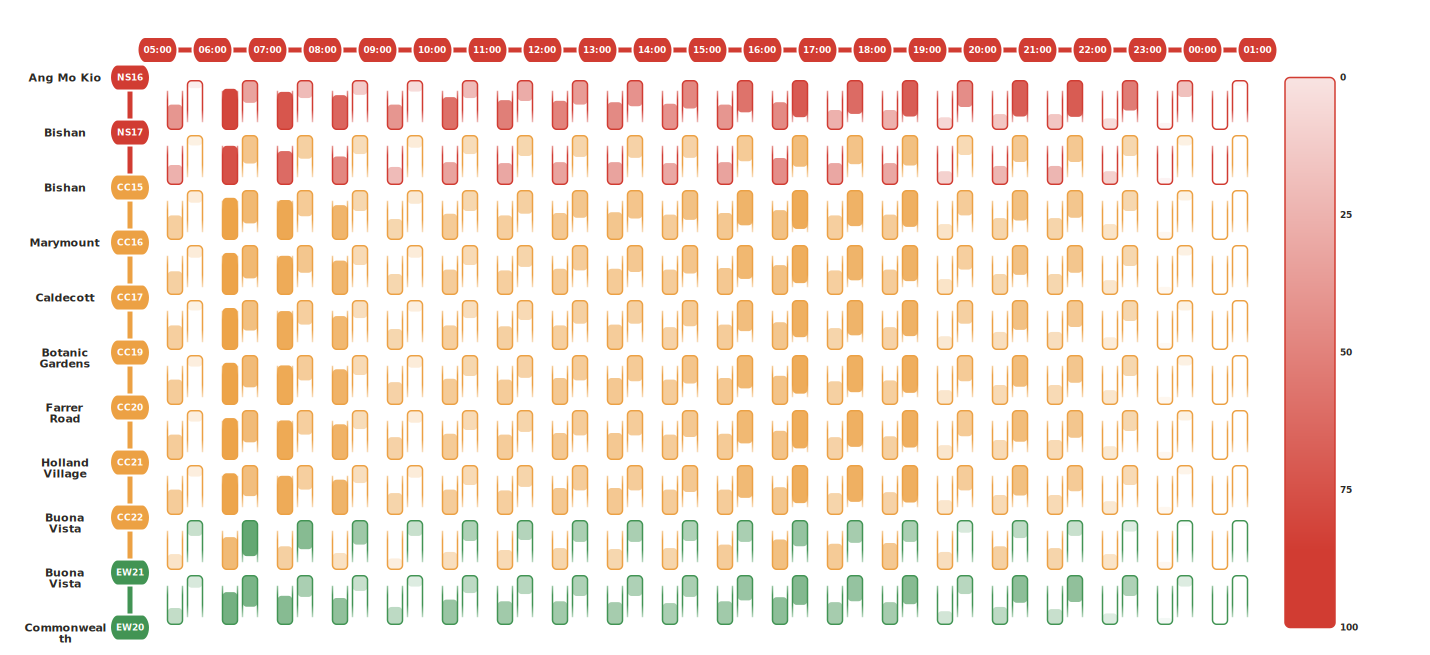

In [17]:
custom_line = nx.shortest_path(network_graph, 'NS16', 'CC24')
custom_line = nx.shortest_path(network_graph, 'DT5', 'TE7')
custom_line = nx.shortest_path(network_graph, 'EW33', 'CG2')
custom_line = nx.shortest_path(network_graph, 'NS16', 'EW20')
# custom_line = extract_same_line_codes(all_lines['EWL']['station_codes'], all_lines['EWL']['line_prefixes'])
forward_df, backward_df = get_data('counts_df.csv', custom_line, 'WEEKDAY')

station_names = [station_name_df.loc[station_code]['mrt_station_english'] for station_code in custom_line]
d = draw_heatmap(forward_df, backward_df, custom_line, station_names, forward_df.columns, data_min=0, data_max=100)
d

Drawing heatmap for line:  ['NS1', 'NS2', 'NS3', 'NS4', 'NS5', 'NS7', 'NS8', 'NS9', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16', 'NS17', 'NS18', 'NS19', 'NS20', 'NS21', 'NS22', 'NS23', 'NS24', 'NS25', 'NS26', 'NS27', 'NS28']
Drawing heatmap for line:  ['NS1', 'NS2', 'NS3', 'NS4', 'NS5', 'NS7', 'NS8', 'NS9', 'NS10', 'NS11', 'NS12', 'NS13', 'NS14', 'NS15', 'NS16', 'NS17', 'NS18', 'NS19', 'NS20', 'NS21', 'NS22', 'NS23', 'NS24', 'NS25', 'NS26', 'NS27', 'NS28']
Drawing heatmap for line:  ['EW1', 'EW2', 'EW3', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8', 'EW9', 'EW10', 'EW11', 'EW12', 'EW13', 'EW14', 'EW15', 'EW16', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21', 'EW22', 'EW23', 'EW24', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW30', 'EW31', 'EW32', 'EW33']
Drawing heatmap for line:  ['EW1', 'EW2', 'EW3', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8', 'EW9', 'EW10', 'EW11', 'EW12', 'EW13', 'EW14', 'EW15', 'EW16', 'EW17', 'EW18', 'EW19', 'EW20', 'EW21', 'EW22', 'EW23', 'EW24', 'EW25', 'EW26', 'EW27', 'EW28', 'E

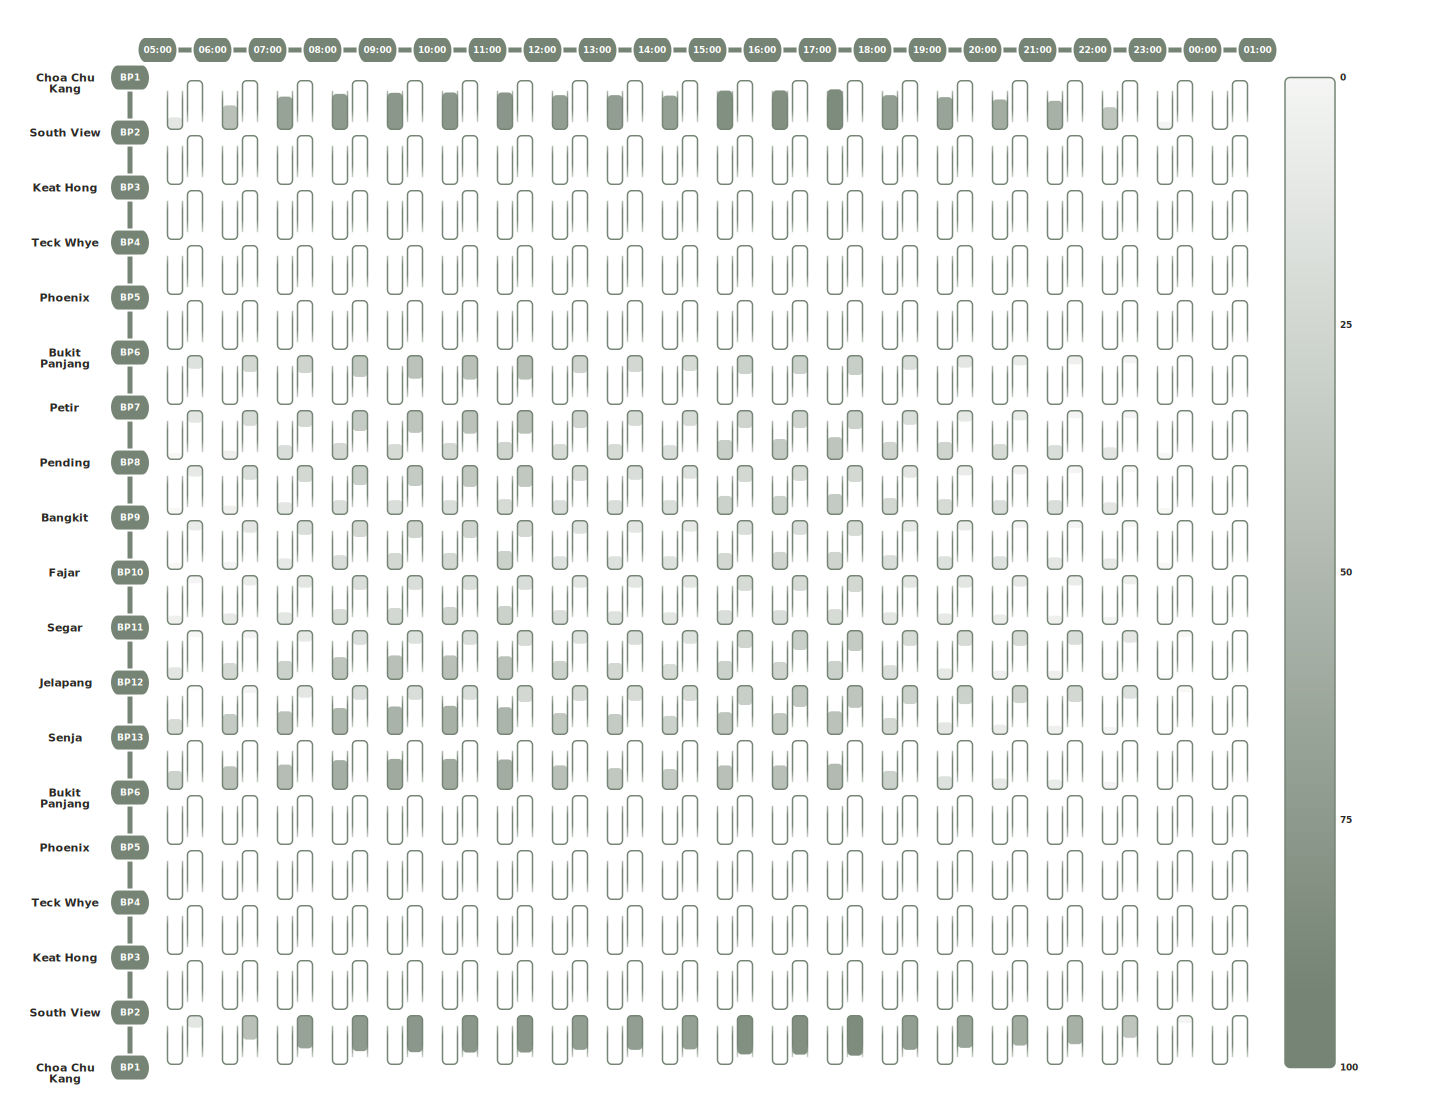

In [22]:

for line_code, data in all_lines.items():
    station_codes = extract_same_line_codes(data['station_codes'], data['line_prefixes'])
    station_names = [station_name_df.loc[station_code]['mrt_station_english'] for station_code in station_codes]
    for day_type in day_types:
        forward_df, backward_df = get_data("counts_df.csv", station_codes, day_type)
        d = draw_heatmap(forward_df, backward_df, station_codes, station_names, hours, data_min=0, data_max=100)

        d.save_svg(f'graphics/{line_code}_{day_type.replace("/", "_")}.svg')
        d.save_png(f'graphics/{line_code}_{day_type.replace("/", "_")}.png')

d

In [20]:
station_codes = extract_same_line_codes(all_lines['BPLRT']['station_codes'], all_lines['BPLRT']['line_prefixes'])
data_df = counts_df[
    counts_df['START'].isin(station_codes) &
    counts_df['END'].isin(station_codes) &
    counts_df['DAY_TYPE'].str.contains(day_type)
]

# backward_sections = [(station_codes[::-1][i], station_codes[::-1][i+1]) for i in range(len(station_codes) - 1)]
# backward_df = data_df[['TIME_PER_HOUR', 'START', 'END', 'COUNT']].set_index(['TIME_PER_HOUR', 'START', 'END'])['COUNT']
# backward_df = backward_df.unstack('TIME_PER_HOUR')[hours]
# backward_df = backward_df.join(pd.DataFrame(index=pd.MultiIndex.from_tuples(backward_sections, names=['START', 'END'])), how='right')
# backward_df

forward_sections = [(station_codes[i], station_codes[i+1]) for i in range(len(station_codes) - 1)]
forward_df = data_df.set_index(['TIME_PER_HOUR', 'START', 'END'])['COUNT']
# forward_df = forward_df.unstack('TIME_PER_HOUR')[hours]
# forward_df = forward_df.join(pd.DataFrame(index=pd.MultiIndex.from_tuples(forward_sections, names=['START', 'END'])), how='right')
forward_df.loc[7]



START  END 
BP1    BP2     25477.444585
BP10   BP11     7481.231252
       BP9     10249.005340
BP11   BP10     6358.654605
       BP12    14584.054784
BP12   BP11     3763.478137
       BP13    18753.982082
BP13   BP12     5226.405435
       BP6     21033.065416
BP2    BP1     30822.834832
       BP3     30054.373219
BP3    BP2     27824.763466
       BP4     34667.102807
BP4    BP3     22749.493054
       BP5     27731.452289
BP5    BP4     24873.842536
       BP6     29264.671533
BP6    BP13     5322.488769
       BP5     24905.061781
       BP7      4735.344565
BP7    BP6     14472.767918
       BP8      4033.511231
BP8    BP7     13179.934584
       BP9      3465.763592
BP9    BP10     4106.581987
       BP8     12315.186945
Name: COUNT, dtype: float64